<a href="https://colab.research.google.com/github/mostafadentist/python-ipynb/blob/main/Queuing_Models_(Operations_Research).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# M/M/1 Queue Performance Measures
def mm1_queue(lmbda, mu):
    rho = lmbda / mu
    if rho >= 1:
        return "System is unstable (λ ≥ μ)."

    L = rho / (1 - rho)       # Avg number in system
    Lq = (rho**2) / (1 - rho) # Avg number in queue
    W = 1 / (mu - lmbda)      # Avg time in system
    Wq = rho / (mu - lmbda)   # Avg waiting time in queue

    return {
        "Utilization (ρ)": round(rho, 3),
        "Avg number in system (L)": round(L, 3),
        "Avg number in queue (Lq)": round(Lq, 3),
        "Avg time in system (W)": round(W, 3),
        "Avg waiting time in queue (Wq)": round(Wq, 3),
    }

# Example: λ = 2 per minute, μ = 3 per minute
results = mm1_queue(2, 3)
print(results)

{'Utilization (ρ)': 0.667, 'Avg number in system (L)': 2.0, 'Avg number in queue (Lq)': 1.333, 'Avg time in system (W)': 1.0, 'Avg waiting time in queue (Wq)': 0.667}


In [2]:
import math

def mmc_queue(lmbda, mu, c):
    rho = lmbda / (c * mu)
    if rho >= 1:
        return "System is unstable (λ ≥ cμ)."

    # Probability of zero customers (P0)
    sum_terms = sum((lmbda/mu)**n / math.factorial(n) for n in range(c))
    last_term = ((lmbda/mu)**c / (math.factorial(c) * (1 - rho)))
    P0 = 1 / (sum_terms + last_term)

    # Average number in queue (Lq)
    Lq = (P0 * (lmbda/mu)**c * rho) / (math.factorial(c) * (1 - rho)**2)

    # Other measures
    L = Lq + lmbda/mu
    Wq = Lq / lmbda
    W = Wq + 1/mu

    return {
        "Utilization (ρ)": round(rho, 3),
        "P0 (no customers)": round(P0, 3),
        "Avg number in system (L)": round(L, 3),
        "Avg number in queue (Lq)": round(Lq, 3),
        "Avg time in system (W)": round(W, 3),
        "Avg waiting time in queue (Wq)": round(Wq, 3),
    }

# Example: λ = 4 per min, μ = 3 per min, c = 2 servers
print(mmc_queue(4, 3, 2))

{'Utilization (ρ)': 0.667, 'P0 (no customers)': 0.2, 'Avg number in system (L)': 2.4, 'Avg number in queue (Lq)': 1.067, 'Avg time in system (W)': 0.6, 'Avg waiting time in queue (Wq)': 0.267}


In [3]:
# Verify that L = λ * W
lmbda, mu = 2, 3
res = mm1_queue(lmbda, mu)

L = res["Avg number in system (L)"]
W = res["Avg time in system (W)"]

print("L =", L, ", λW =", round(lmbda * W, 3))

L = 2.0 , λW = 2.0


Simulated average wait time: 0.503


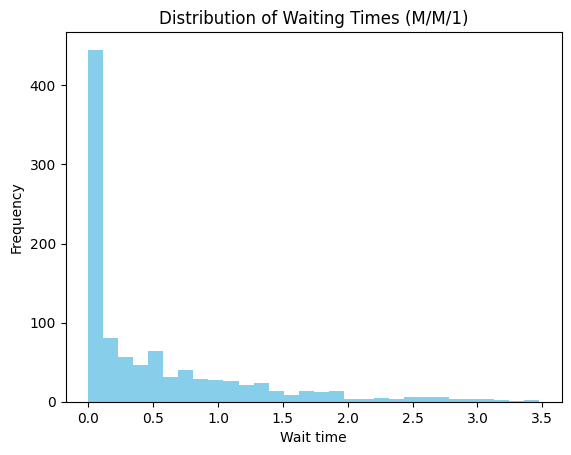

In [4]:
import random
import matplotlib.pyplot as plt

def simulate_mm1(lmbda, mu, num_customers=1000):
    arrival_times = [0]
    for i in range(1, num_customers):
        interarrival = random.expovariate(lmbda)  # exponential arrivals
        arrival_times.append(arrival_times[-1] + interarrival)

    service_times = [random.expovariate(mu) for _ in range(num_customers)]
    start_times, finish_times, wait_times = [], [], []

    current_time = 0
    for i in range(num_customers):
        start = max(arrival_times[i], current_time)
        finish = start + service_times[i]
        wait = start - arrival_times[i]

        start_times.append(start)
        finish_times.append(finish)
        wait_times.append(wait)

        current_time = finish

    avg_wait = sum(wait_times) / num_customers
    return avg_wait, wait_times

# Example simulation
avg_wait, waits = simulate_mm1(2, 3)
print("Simulated average wait time:", round(avg_wait, 3))

plt.hist(waits, bins=30, color='skyblue')
plt.title("Distribution of Waiting Times (M/M/1)")
plt.xlabel("Wait time")
plt.ylabel("Frequency")
plt.show()